In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import csv

In [3]:
# Constants
d = 0.3071 #MeVcm^2/g
zl = 6 + 1 +17*3 #atomic number of absorber
a = 119.4 #mass number of absober
zs = 54 #charge of Xe
I = 16 * zl**0.9 - 20 #平均イオン化エネルギー(eV)要検討!
c = 3.0e+8 #m/s
M = 131*1.67e-27 #kg
me = 9.1e-31 #kg
jmev = 1/(1.6*10e-14) #J → MeV
mc2 = M * (c**2) * jmev #MeV
mec2 = me * (c**2) * jmev #MeV
beta2 = (1 - (mc2/(E_c+mc2))**2)

NameError: name 'E_c' is not defined

In [4]:
##############################################Water###############################################################

Stopping range : 27mm
55
55


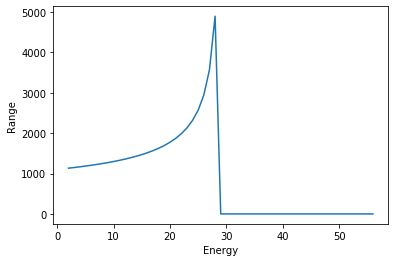

BETHE BLOCH


In [5]:
#Bethe-Bloch formula

def dE_dx(Ekin):   #Bethe Bloch 
    b1 = d * zl*(zs**2) / a
    w = Ekin/mc2
    b2 = ((w+1)**2)/(w*(w+2))
    b3 = np.log(2*mec2*w*(w+2)/I**2)
    
    return -b1*(b2*b3-1)/10                  #MeV/mm(MeV/cmでない)

    


E_c = 400*131        #入射エネルギー

E_l = [] #初期化
for i in range(100): 
    if E_c <= dE_dx(E_c):
        print("Stopping range : "+str(i)+"mm")      #飛程出力
        for j in range(55-i):
            E_l.append(0)
        
        break                 #ループを抜ける
    else:                     # E_cが0になるまでE_currentから引き続ける
        E_l.append(dE_dx(E_c))
        E_c -= dE_dx(E_c)    
    
#横軸x
x = [] #初期化
for i in range(len(E_l)):
    
    x.append(i+2)
    i += 1
    
    
#結果を出力
print(len(E_l))

print(len(x))
#print(E_l)

plt.plot(x, E_l)
#plt.xlim([0,5])
"""plt.tick_params(labelleft=False,
               labelbottom=False)
"""
plt.xlabel('Energy')
plt.ylabel('Range')
plt.show()
print("BETHE BLOCH")

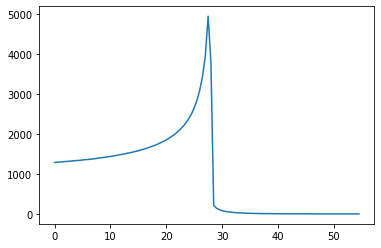

In [16]:
dose = np.loadtxt('dose_c.csv',delimiter = ',')
rng = dose[:,0]
rng *= 42000
z = []
for a in range(len(rng)):
    z.append(0.5*a)

plt.plot(z, rng)
plt.show()

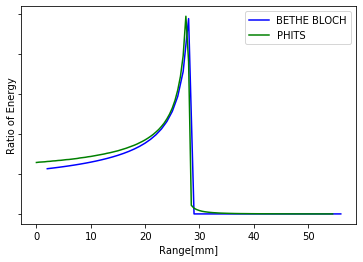

<Figure size 432x288 with 0 Axes>

In [17]:
c1,c2 = "blue","green"
l1,l2 = "BETHE BLOCH","PHITS"

plt.plot(x, E_l, color=c1, label=l1)
plt.plot(z, rng, color=c2, label=l2)
plt.tick_params(labelleft=False)
plt.ylabel('Ratio of Energy')
plt.xlabel('Range[mm]')
#plt.title('Chloroform')
plt.legend(loc=0)
plt.show()
plt.savefig('chloroform_phitsbethe.png')